# Example of Total Internal Reflection on the Glass / Air interface

Author: O. Castany, M.Müller

In [1]:
import numpy as np
import berreman4x4 as bm
import matplotlib.pyplot as plt

## Structure definition

In [2]:
# Refractive indices
n_glass = 1.5
n_air = 1.0

# Materials:
glass = bm.IsotropicMaterial(bm.DispersionLess(n_glass))
air = bm.IsotropicMaterial(bm.DispersionLess(n_air))

# Structure:
s = bm.Structure(glass, [], air)

# Wavelength
lbda = 1000      # nm

# Variation of incidence angle
Phi_list = np.linspace(0, 89, 90)

## Calculation

In [3]:
R = []
T = []

for Phi_i in Phi_list:
    data = s.evaluate(lbda, Phi_i)
    R.append(data.R[0])
    T.append(data.T[0])
    
R = np.array(R)

## Plotting

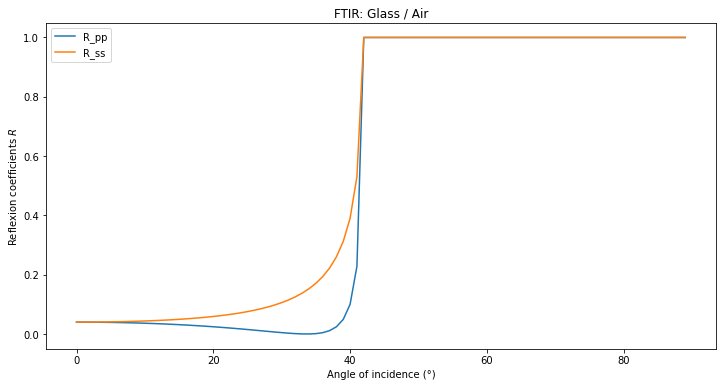

In [4]:
plt.figure(figsize=(12., 6.))
plt.plot(Phi_list, np.real(R[:, 0, 0]), label='R_pp')
plt.plot(Phi_list, np.real(R[:, 1, 1]), label='R_ss')
plt.title("FTIR: Glass / Air")
plt.xlabel(u"Angle of incidence (°)")
plt.ylabel(r"Reflexion coefficients $R$")
plt.legend()
plt.show()